In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc


%matplotlib inline

In [47]:
font_list=fm.findSystemFonts(fontpaths=None,fontext='ttf')
print(font_list[:5])
a=fm.FontProperties(fname=font_list[0])
b=a.get_name()
rc('font',family=b)

['C:\\Windows\\Fonts\\ITCBLKAD.TTF', 'C:\\Windows\\Fonts\\monbaiti.ttf', 'C:\\Windows\\Fonts\\GARA.TTF', 'C:\\Windows\\Fonts\\LBRITE.TTF', 'C:\\Windows\\Fonts\\ARIALNI.TTF']


1. 데이터 전처리를 위한 준비

In [48]:
dt=pd.read_csv('C:\\Users\\Hwan\\Desktop\\satisfaction.csv')
dt.head()

,INTNR,SQ1,SQ2,AGE,SQ3,Q1,Q2_1,Q2_2,Q2_3,Q2_4,...,DM1,DM2,DM3,DM4,DM5,DM6,DM7,DM8,DM9,WT
0,1,1,2,35,3,8,8,7,9,99,...,2.0,2.0,4.0,1.0,2.0,2.0,2.0,5.0,8.0,1.04
1,106,1,1,20,2,6,7,7,7,99,...,1.0,1.0,3.0,1.0,1.0,1.0,3.0,9.0,1.0,1.00
2,282,1,1,50,5,0,5,5,10,10,...,1.0,4.0,4.0,1.0,4.0,3.0,1.0,5.0,8.0,0.96
3,332,15,1,64,6,8,10,9,6,99,...,1.0,5.0,2.0,6.0,3.0,3.0,1.0,11.0,5.0,0.92
4,357,5,1,55,5,9,8,7,9,8,...,1.0,4.0,4.0,4.0,4.0,3.0,1.0,5.0,9.0,0.80


In [49]:
dt.describe()

,INTNR,SQ1,SQ2,AGE,SQ3,Q1,Q2_1,Q2_2,Q2_3,Q2_4,...,DM1,DM2,DM3,DM4,DM5,DM6,DM7,DM8,DM9,WT
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,69266.116667,7.074667,1.494667,47.026667,4.186000,6.098667,6.834667,5.911333,7.818667,49.482000,...,1.494667,3.186000,3.132000,3.246667,3.045333,2.583333,1.770000,5.990667,13.458667,0.999680
std,89513.953148,4.688256,0.500138,16.019396,1.428553,2.424772,2.106408,2.333617,2.226452,46.119508,...,0.500138,1.428553,1.254176,1.901640,1.222678,0.783666,1.217958,5.123418,27.754648,0.311258
min,1.000000,1.000000,1.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.310000
25%,17959.500000,2.000000,1.000000,35.000000,3.000000,5.000000,5.000000,5.000000,7.000000,7.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,0.870000
50%,30280.500000,8.000000,1.000000,47.000000,4.000000,6.000000,7.000000,6.000000,8.000000,10.000000,...,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,5.000000,5.000000,0.990000
75%,63683.500000,10.000000,2.000000,60.000000,6.000000,8.000000,8.000000,8.000000,10.000000,99.000000,...,2.000000,5.000000,4.000000,5.000000,4.000000,3.000000,2.000000,8.000000,7.000000,1.000000
max,304561.000000,17.000000,2.000000,92.000000,6.000000,10.000000,10.000000,10.000000,10.000000,99.000000,...,2.000000,5.000000,9.000000,7.000000,9.000000,9.000000,9.000000,99.000000,99.000000,5.500000


2. Missing Value 확인

In [50]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 47 columns):
INTNR     1500 non-null int64
SQ1       1500 non-null int64
SQ2       1500 non-null int64
AGE       1500 non-null int64
SQ3       1500 non-null int64
Q1        1500 non-null int64
Q2_1      1500 non-null int64
Q2_2      1500 non-null int64
Q2_3      1500 non-null int64
Q2_4      1500 non-null int64
Q2_5      1500 non-null int64
Q2_6      1500 non-null int64
Q2_7      1500 non-null int64
Q2_8      1500 non-null int64
Q3        1500 non-null int64
Q3_m2     1500 non-null int64
Q3_m3     1500 non-null int64
Q4        1500 non-null int64
Q5        1500 non-null int64
Q6        1500 non-null int64
Q7        1500 non-null int64
Q8        1500 non-null int64
Q9        1500 non-null int64
Q10       1500 non-null int64
Q11       1500 non-null int64
Q12       1500 non-null int64
Q12_m2    1500 non-null int64
DQ1       1500 non-null int64
DQ2       1500 non-null int64
DQ3       1500 non-null

In [51]:
dt.isnull().sum()

INTNR     0
SQ1       0
SQ2       0
AGE       0
SQ3       0
Q1        0
Q2_1      0
Q2_2      0
Q2_3      0
Q2_4      0
Q2_5      0
Q2_6      0
Q2_7      0
Q2_8      0
Q3        0
Q3_m2     0
Q3_m3     0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q12_m2    0
DQ1       0
DQ2       0
DQ3       0
DQ4       0
DQ5       0
DQ5_m2    0
DQ5_m3    0
DQ5_m4    0
DQ5_1     0
DQ6       0
DM1       0
DM2       0
DM3       0
DM4       0
DM5       0
DM6       0
DM7       0
DM8       0
DM9       0
WT        0
dtype: int64

3. 데이터 전처리

In [52]:
dt=dt.drop(['INTNR','SQ1','SQ2','SQ3','DQ1','DQ2','DQ3','DQ4','DQ5','DQ5_m2','DQ5_m3','DQ5_m4','DQ5_1','DQ6','WT'],axis=1)
dt.head()

,AGE,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q12_m2,DM1,DM2,DM3,DM4,DM5,DM6,DM7,DM8,DM9
0,35,8,8,7,9,99,7,8,8,8,...,6,2.0,2.0,4.0,1.0,2.0,2.0,2.0,5.0,8.0
1,20,6,7,7,7,99,5,6,8,6,...,6,1.0,1.0,3.0,1.0,1.0,1.0,3.0,9.0,1.0
2,50,0,5,5,10,10,5,5,5,5,...,6,1.0,4.0,4.0,1.0,4.0,3.0,1.0,5.0,8.0
3,64,8,10,9,6,99,8,7,9,9,...,3,1.0,5.0,2.0,6.0,3.0,3.0,1.0,11.0,5.0
4,55,9,8,7,9,8,9,8,8,8,...,1,1.0,4.0,4.0,4.0,4.0,3.0,1.0,5.0,9.0


In [53]:
dt.rename(columns={"DM1":"Sex","DM2":"Ages","DM3":"Education","DM4":"Province",'DM5':"Num_family_mem",'DM6':"Form_family",'DM7':"Residential_types",'DM8':"occupation",'DM9':'Income'}, inplace = True)

In [54]:
dt.head()

,AGE,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q12_m2,Sex,Ages,Education,Province,Num_family_mem,Form_family,Residential_types,occupation,Income
0,35,8,8,7,9,99,7,8,8,8,...,6,2.0,2.0,4.0,1.0,2.0,2.0,2.0,5.0,8.0
1,20,6,7,7,7,99,5,6,8,6,...,6,1.0,1.0,3.0,1.0,1.0,1.0,3.0,9.0,1.0
2,50,0,5,5,10,10,5,5,5,5,...,6,1.0,4.0,4.0,1.0,4.0,3.0,1.0,5.0,8.0
3,64,8,10,9,6,99,8,7,9,9,...,3,1.0,5.0,2.0,6.0,3.0,3.0,1.0,11.0,5.0
4,55,9,8,7,9,8,9,8,8,8,...,1,1.0,4.0,4.0,4.0,4.0,3.0,1.0,5.0,9.0


DM1(Sex)성별 1. 남자
             2. 여자

DM2(Ages)연령	1. 19-29세     
              2. 30대
              3. 40대
              4. 50대
              5. 60대 이상
                
DM3(Education)최종학력  1. 중학교 졸업 이하
                        2. 고등학교 졸업
                        3. 대학교 재학
                        4. 대학교 졸업
                        5. 대학원 졸업
                        9. 모름/무응답
                    
DM4(Province)거주지역1. 서울
                     2. 인천/경기
                     3. 대전/충청
                     4. 광주/전라
                     5. 대구/경북
                     6. 부산/울산/경남
                     7. 강원/제주
                        
DM5(Num_family_mem)가구원 수1. 1명
                            2. 2명
                            3. 3명
                            4. 4명
                            5. 5명 이상
                            9. 응답거절
                    
DM6(Form_family)가구원 구성 1. 1인 가구
                            2. 1세대 가구
                            3. 2세대 가구
                            4. 3세대 가구
                            9. 응답거절
                
DM7(Residential_types)거주형태  1. 자가
                                2. 전세
                                3. 월세
                                4. 무상 거주
                                5. 기타
                                9. 모름/무응답
                    
DM8(Occupation)직업 1. 농림어업
                    2. 자영업자
                    3. 판매/영업/서비스직
                    4. 노무/기계조작/운송/기능직
                    5. 사무직
                    6. 경영 관리직
                    7. 전문직
                    8. 전업주부
                    9. 학생
                    10. 다른 직업
                    11. 무직, 퇴직, 은퇴 등
                    99. 모름/무응답
                    
DM9(Income)월평균 가구소득  1. 100만원 미만
                            2. 100~200만원 미만
                            3. 200~300만원 미만
                            4. 300~400만원 미만
                            5. 400~500만원 미만
                            6. 500~600만원 미만
                            7. 600~700만원 미만
                            8. 700~1천만원 미만
                            9. 1천만원 이상
                            99. 모름/무응답


In [55]:
#dt.isnull().sum()

In [56]:
dt.describe()

,AGE,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q12_m2,Sex,Ages,Education,Province,Num_family_mem,Form_family,Residential_types,occupation,Income
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,47.026667,6.098667,6.834667,5.911333,7.818667,49.482000,5.438000,5.665333,6.525333,5.884667,...,4.088000,1.494667,3.186000,3.132000,3.246667,3.045333,2.583333,1.770000,5.990667,13.458667
std,16.019396,2.424772,2.106408,2.333617,2.226452,46.119508,2.636941,2.558716,2.287250,2.299904,...,1.783922,0.500138,1.428553,1.254176,1.901640,1.222678,0.783666,1.217958,5.123418,27.754648
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,5.000000,5.000000,5.000000,7.000000,7.000000,4.000000,4.000000,5.000000,5.000000,...,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000
50%,47.000000,6.000000,7.000000,6.000000,8.000000,10.000000,5.000000,6.000000,7.000000,6.000000,...,4.000000,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,5.000000,5.000000
75%,60.000000,8.000000,8.000000,8.000000,10.000000,99.000000,7.000000,8.000000,8.000000,8.000000,...,6.000000,2.000000,5.000000,4.000000,5.000000,4.000000,3.000000,2.000000,8.000000,7.000000
max,92.000000,10.000000,10.000000,10.000000,10.000000,99.000000,10.000000,10.000000,10.000000,10.000000,...,7.000000,2.000000,5.000000,9.000000,7.000000,9.000000,9.000000,9.000000,99.000000,99.000000


In [57]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 32 columns):
AGE                  1500 non-null int64
Q1                   1500 non-null int64
Q2_1                 1500 non-null int64
Q2_2                 1500 non-null int64
Q2_3                 1500 non-null int64
Q2_4                 1500 non-null int64
Q2_5                 1500 non-null int64
Q2_6                 1500 non-null int64
Q2_7                 1500 non-null int64
Q2_8                 1500 non-null int64
Q3                   1500 non-null int64
Q3_m2                1500 non-null int64
Q3_m3                1500 non-null int64
Q4                   1500 non-null int64
Q5                   1500 non-null int64
Q6                   1500 non-null int64
Q7                   1500 non-null int64
Q8                   1500 non-null int64
Q9                   1500 non-null int64
Q10                  1500 non-null int64
Q11                  1500 non-null int64
Q12                  1500 non-nu

4. 데이터 분석

In [58]:
#항목별 전반적 삶의 만족도 평균
#"Q1"=전반적 삶의 만족도

qlist=['Sex','Ages','Education','Province','Num_family_mem','Form_family','Residential_types','occupation','Income']
Q1_list=[]
for x in qlist:
    meanVal=dt['Q1'].groupby(dt[x]).mean()
    print(meanVal)
    Q1_list.append(meanVal)
    print('========================')


Sex
1.0    5.736148
2.0    6.469003
Name: Q1, dtype: float64
Ages
1.0    6.740310
2.0    6.571970
3.0    6.225589
4.0    5.742574
5.0    5.515873
Name: Q1, dtype: float64
Education
1.0    5.255952
2.0    5.640777
3.0    6.574257
4.0    6.456461
5.0    6.343137
9.0    6.600000
Name: Q1, dtype: float64
Province
1.0    6.127586
2.0    6.126638
3.0    6.159236
4.0    6.458904
5.0    5.860927
6.0    5.900862
7.0    6.075758
Name: Q1, dtype: float64
Num_family_mem
1.0    6.167598
2.0    5.929539
3.0    6.231003
4.0    6.200000
5.0    5.862275
9.0    6.000000
Name: Q1, dtype: float64
Form_family
1.0    6.167598
2.0    6.071225
3.0    6.079686
4.0    6.282051
9.0    6.000000
Name: Q1, dtype: float64
Residential_types
1.0    6.130099
2.0    6.218391
3.0    5.631285
4.0    6.358333
5.0    6.181818
9.0    5.272727
Name: Q1, dtype: float64
occupation
1.0     5.529412
2.0     5.391304
3.0     6.451389
4.0     5.173913
5.0     6.641935
6.0     6.250000
7.0     6.482143
8.0     6.267782
9.0     6.692

In [70]:
#전반적 삶의 만족도 점수별 분포
q1_valc=dt['Q1'].value_counts()
q1_valc=q1_valc.sort_index(ascending=True)
q1_valc

0      82
1      17
2      24
3      69
4      70
5     330
6     167
7     284
8     269
9      76
10    112
Name: Q1, dtype: int64

In [83]:
#전반적 삶의 만족도 점수별 비율
q1_valc_pt=q1_valc/1500*100
q1_valc_pt=q1_valc_pt.round(2)
dt_q1=pd.DataFrame(q1_valc_pt)
dt_q1

,Q1
0,5.47
1,1.13
2,1.60
3,4.60
4,4.67
5,22.00
6,11.13
7,18.93
8,17.93
9,5.07


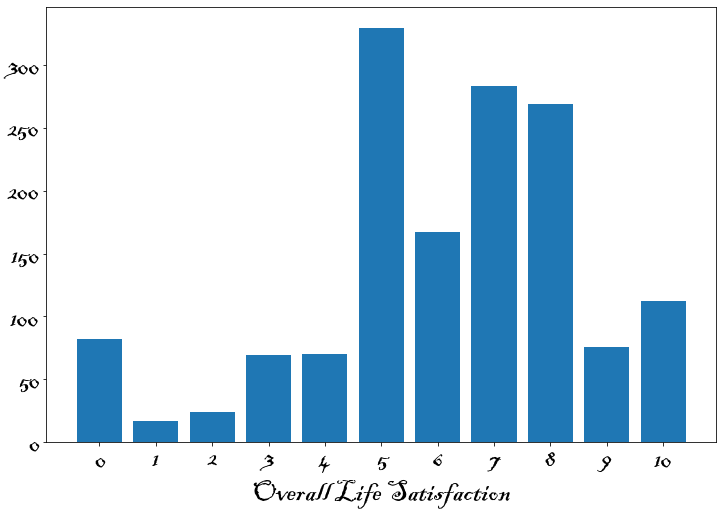

In [84]:
#전반적 삶의 만족도 점수별 분포 그래프 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ypos = np.arange(11)
rects = plt.bar(ypos, q1_valc, align='center')
plt.xticks(ypos, q1_valc.index)
plt.rcParams.update({'font.size': 30})

plt.xlabel('Overall Life Satisfaction')
plt.show()

In [71]:
Q1_list[3]

Province
1.0    6.127586
2.0    6.126638
3.0    6.159236
4.0    6.458904
5.0    5.860927
6.0    5.900862
7.0    6.075758
Name: Q1, dtype: float64

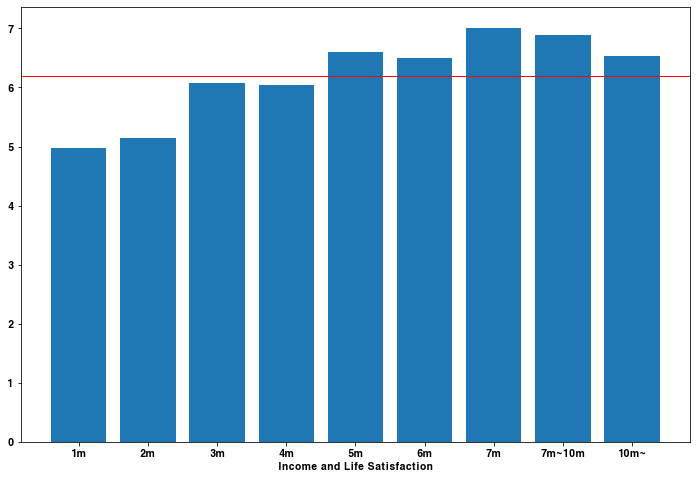

In [72]:
#소득과 삶의 만족도 그래프

income=["1m","2m",'3m','4m','5m','6m','7m','7m~10m','10m~']
income_satf=[4.978571,5.140845,6.072816,6.048246,6.597222,6.500000,7.012987,6.890909,6.530864]
income_satf_mean=np.array(income_satf).mean()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ypos = np.arange(9)
rects = plt.bar(ypos, income_satf, align='center')
plt.xticks(ypos, income)
plt.axhline(y=income_satf_mean, color='r', linewidth=1)

plt.xlabel('Income and Life Satisfaction')
plt.show()


1. 소득이 올라갈수록 전반적인 삶의 만족도도 상승한다.
2. 하지만 비례하여 상승하지는 않는다. 특히 7m 이상에서는 만족도가 다시 떨어지는 경향을 보인다.
3. 저소득층 구간(1m,2m) 구간의 삶의 만족도는 평균에 비해 심히 낮다.
4. 5m 구간이 되어서야 전반적 삶의 만족도가 평균이상이 된다.

In [73]:
#항목별 "일자리와 소득 만족도" 퍙균
#Q2_5="일자리와 소득"

qlist0=['Sex','Ages','Education','Province','Num_family_mem','Form_family','Residential_types','occupation','Income']

for x in qlist:
    meanVal=dt['Q2_5'].groupby(dt[x]).mean()
    print(meanVal)
    print('========================')
    

Sex
1.0    5.249340
2.0    5.630728
Name: Q2_5, dtype: float64
Ages
1.0    5.782946
2.0    5.803030
3.0    5.710438
4.0    5.171617
5.0    4.947090
Name: Q2_5, dtype: float64
Education
1.0    4.327381
2.0    5.055825
3.0    5.574257
4.0    5.841292
5.0    5.784314
9.0    7.000000
Name: Q2_5, dtype: float64
Province
1.0    5.665517
2.0    5.379913
3.0    5.439490
4.0    5.602740
5.0    5.450331
6.0    5.129310
7.0    5.530303
Name: Q2_5, dtype: float64
Num_family_mem
1.0    5.245810
2.0    5.395664
3.0    5.519757
4.0    5.553846
5.0    5.269461
9.0    4.000000
Name: Q2_5, dtype: float64
Form_family
1.0    5.245810
2.0    5.566952
3.0    5.410774
4.0    5.628205
9.0    4.000000
Name: Q2_5, dtype: float64
Residential_types
1.0    5.520397
2.0    5.509579
3.0    4.877095
4.0    5.600000
5.0    5.090909
9.0    5.000000
Name: Q2_5, dtype: float64
occupation
1.0     4.725490
2.0     4.695652
3.0     5.812500
4.0     5.195652
5.0     6.061290
6.0     6.687500
7.0     5.875000
8.0     5.573222

['Q2_1','Q2_2','Q2_3','Q2_4','Q2_5','Q2_6','Q2_7','Q2_8']=
['건강과 의료','사회보장과 복지','가족관계','자녀 양육과 교육','일자리와 소득','문화와 여가생활','주거환경','자연환경과 재난안전']

In [74]:
#Q2_4(자녀 양육과 교육) 문항에서 자녀없음=99 처리된 값 NaN 값으로 처리
dt['Q2_4'] = dt['Q2_4'].replace(99,np.nan)

In [104]:
#소득구간별 각 문항에 대한 만족도 평균
qlist1=['Q2_1','Q2_2','Q2_3','Q2_4','Q2_5','Q2_6','Q2_7','Q2_8']
qlist1_list=[]
for x in qlist1:
    incomeMean=dt[x].groupby(dt['Income']).mean()
    print(incomeMean)
    qlist1_list.append(incomeMean)
    print('=========================')

Income
1.0     6.028571
2.0     6.443662
3.0     6.898058
4.0     6.767544
5.0     7.092593
6.0     6.778481
7.0     7.298701
8.0     7.463636
9.0     7.481481
99.0    6.598592
Name: Q2_1, dtype: float64
Income
1.0     5.878571
2.0     5.753521
3.0     5.936893
4.0     5.754386
5.0     6.060185
6.0     6.031646
7.0     5.870130
8.0     5.972727
9.0     6.419753
99.0    5.640845
Name: Q2_2, dtype: float64
Income
1.0     6.742857
2.0     7.647887
3.0     7.820388
4.0     7.706140
5.0     7.967593
6.0     8.227848
7.0     8.103896
8.0     8.327273
9.0     8.172840
99.0    7.795775
Name: Q2_3, dtype: float64
Income
1.0     7.020833
2.0     6.459016
3.0     6.022472
4.0     6.431507
5.0     6.939850
6.0     6.745455
7.0     6.938776
8.0     7.178082
9.0     5.847826
99.0    6.428571
Name: Q2_4, dtype: float64
Income
1.0     3.857143
2.0     4.471831
3.0     5.276699
4.0     5.561404
5.0     5.875000
6.0     5.829114
7.0     6.610390
8.0     6.609091
9.0     6.382716
99.0    4.816901
Name: Q

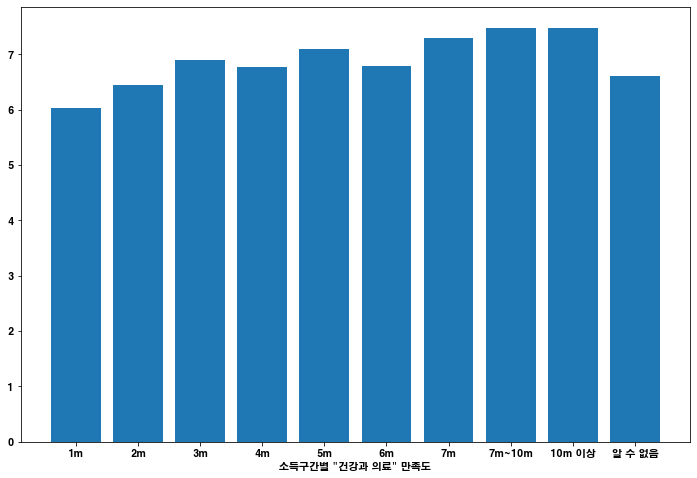

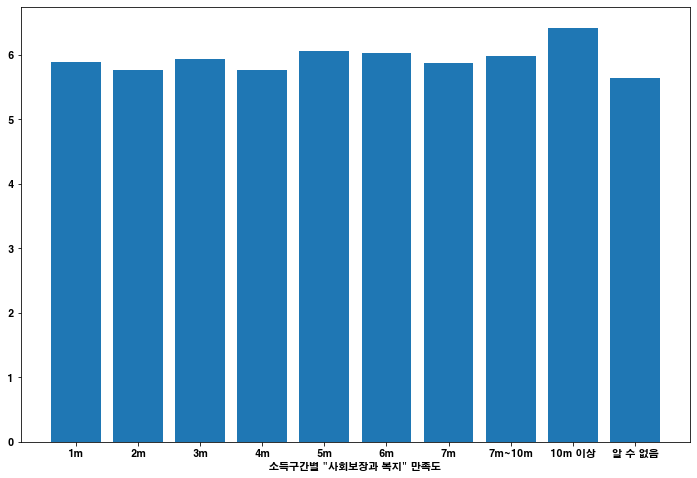

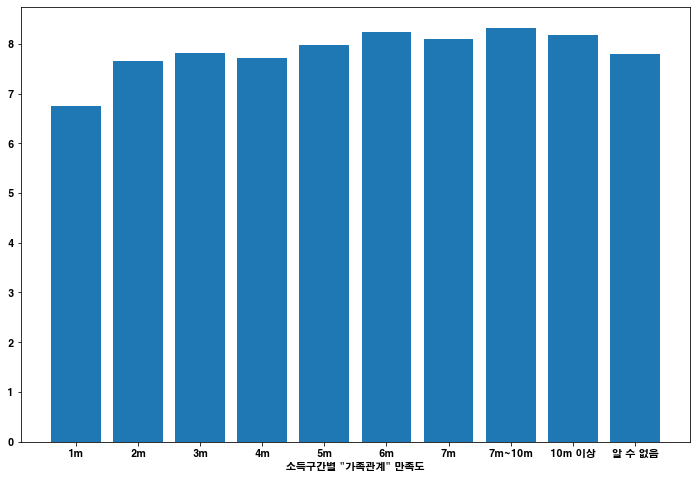

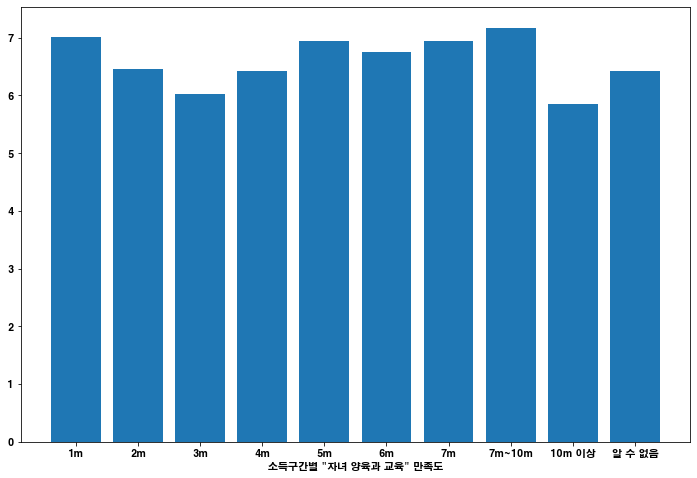

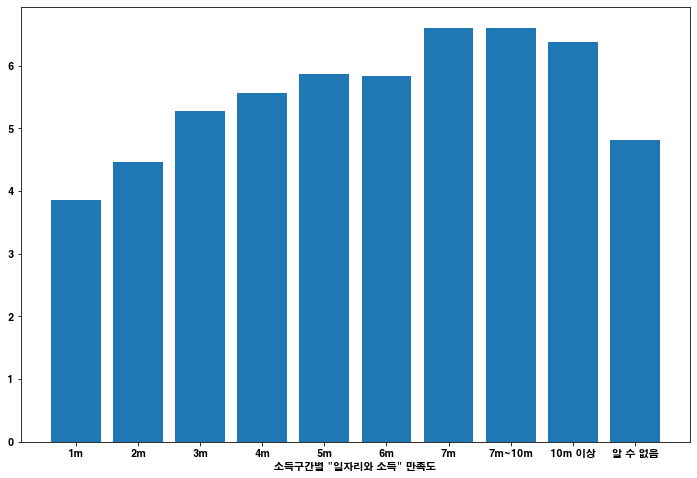

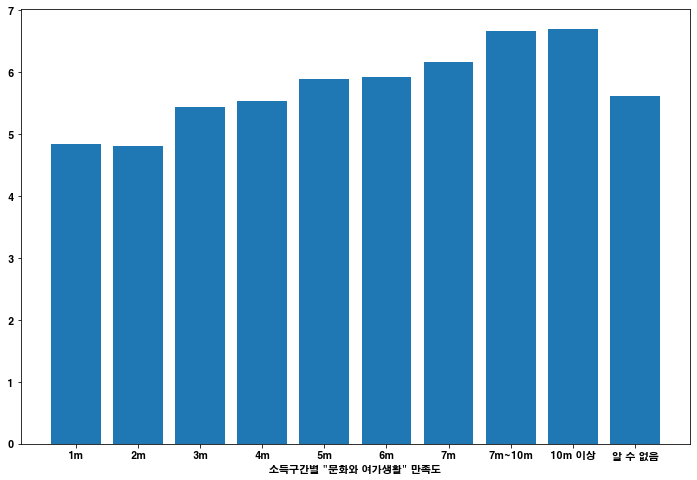

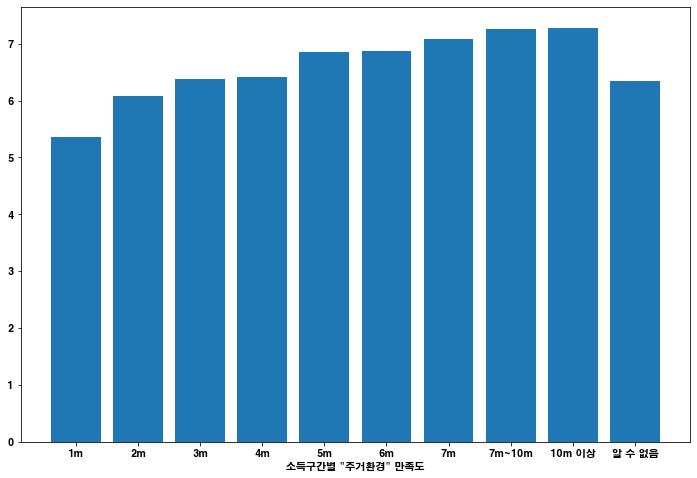

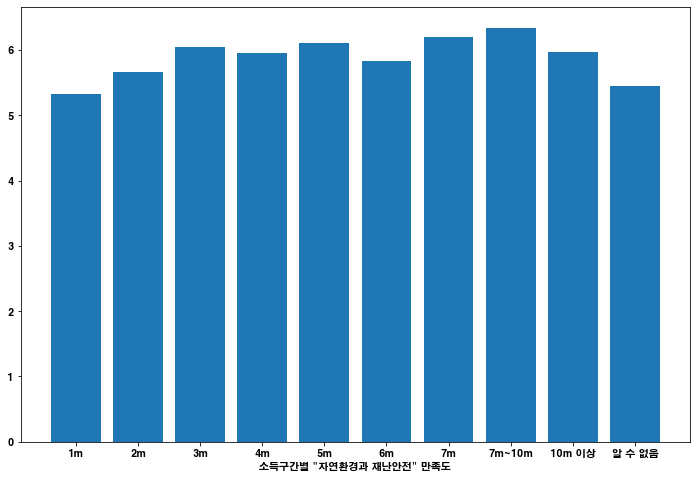

In [118]:
#소득구간별 각 문항에 대한 만족도

income_list=["1m", "2m", "3m" ,"4m", "5m",'6m','7m','7m~10m','10m 이상','알 수 없음']
qlist1_K=['건강과 의료','사회보장과 복지','가족관계','자녀 양육과 교육','일자리와 소득','문화와 여가생활','주거환경','자연환경과 재난안전']

for i,j in zip(qlist1_K, qlist1_list):
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(111)
    ypos = np.arange(10)
    rects = plt.bar(ypos,j,align='center')
    plt.xticks(ypos, income_list)

    plt.xlabel('소득구간별 "' + i + '" 만족도')
    plt.show()

In [77]:
#1m 소득구간의 8개부문에 대한 만족도
sections_satfs=[]
for x in qlist1_list:
    y=(x.loc[1.0])
    sections_satfs.append(y)

print(sections_satfs)

[6.0285714285714285, 5.878571428571429, 6.742857142857143, 7.020833333333333, 3.857142857142857, 4.8428571428571425, 5.35, 5.328571428571428]


In [78]:
#3m 소득구간의 8개부문에 대한 만족도
sections_satfs3=[]
for x in qlist1_list:
    y=(x.loc[3.0])
    sections_satfs3.append(y)

print(sections_satfs3)


[6.898058252427185, 5.936893203883495, 7.820388349514563, 6.022471910112359, 5.276699029126213, 5.432038834951456, 6.378640776699029, 6.053398058252427]


In [79]:
#5m 소득구간의 8개부문에 대한 만족도
sections_satfs5=[]
for x in qlist1_list:
    y=(x.loc[5.0])
    sections_satfs5.append(y)

print(sections_satfs5)


[7.092592592592593, 6.060185185185185, 7.967592592592593, 6.93984962406015, 5.875, 5.888888888888889, 6.847222222222222, 6.111111111111111]


In [80]:
#7m 소득구간의 8개부문에 대한 만족도
sections_satfs7=[]
for x in qlist1_list:
    y=(x.loc[7.0])
    sections_satfs7.append(y)

print(sections_satfs7)

[7.298701298701299, 5.87012987012987, 8.103896103896103, 6.938775510204081, 6.6103896103896105, 6.1688311688311686, 7.077922077922078, 6.194805194805195]


In [81]:
#10m 이상 소득구간의 8개부문에 대한 만족도
sections_satfs10=[]
for x in qlist1_list:
    y=(x.loc[9.0])
    sections_satfs10.append(y)

print(sections_satfs10)

[7.481481481481482, 6.419753086419753, 8.17283950617284, 5.8478260869565215, 6.382716049382716, 6.691358024691358, 7.283950617283951, 5.962962962962963]


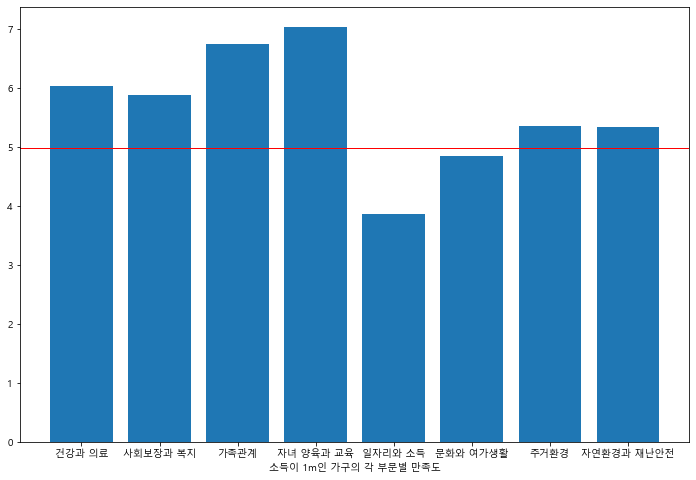

In [78]:
qlist1_K=['건강과 의료','사회보장과 복지','가족관계','자녀 양육과 교육','일자리와 소득','문화와 여가생활','주거환경','자연환경과 재난안전']

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
ypos = np.arange(8)
rects = plt.bar(ypos,sections_satfs,align='center')
plt.xticks(ypos, qlist1_K)
plt.axhline(y=income_satf[0], color='r', linewidth=1)

plt.xlabel('소득이 1m인 가구의 각 부문별 만족도')
plt.show()

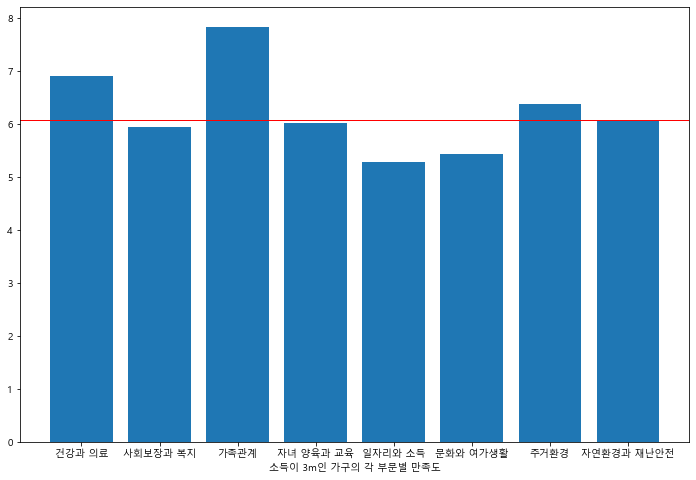

In [56]:
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
ypos = np.arange(8)
rects = plt.bar(ypos,sections_satfs3,align='center')
plt.xticks(ypos, qlist1_K)
plt.axhline(y=income_satf[2], color='r', linewidth=1)

plt.xlabel('소득이 3m인 가구의 각 부문별 만족도')
plt.show()

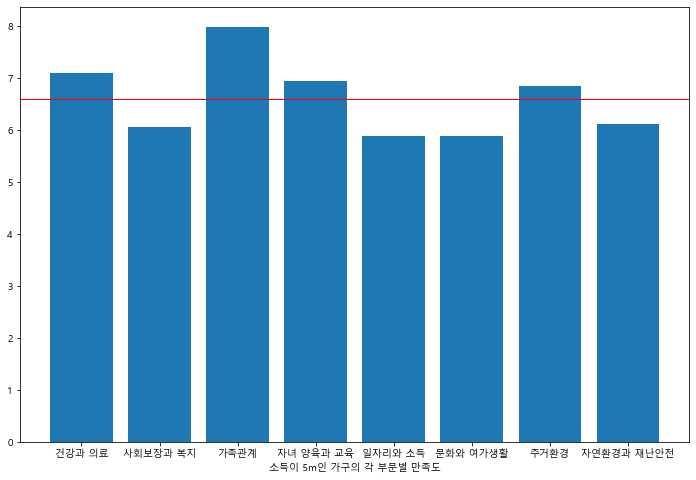

In [80]:
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
ypos = np.arange(8)
rects = plt.bar(ypos,sections_satfs5,align='center')
plt.xticks(ypos, qlist1_K)
plt.axhline(y=income_satf[4], color='r', linewidth=1)

plt.xlabel('소득이 5m인 가구의 각 부문별 만족도')
plt.show()

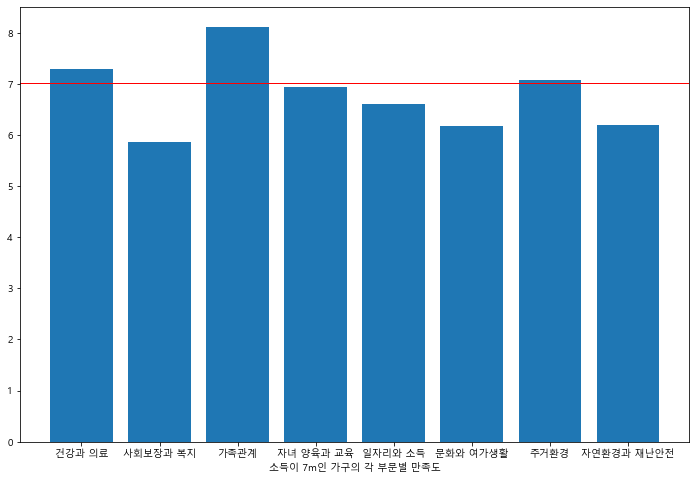

In [81]:
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
ypos = np.arange(8)
rects = plt.bar(ypos,sections_satfs7,align='center')
plt.xticks(ypos, qlist1_K)
plt.axhline(y=income_satf[6], color='r', linewidth=1)

plt.xlabel('소득이 7m인 가구의 각 부문별 만족도')
plt.show()

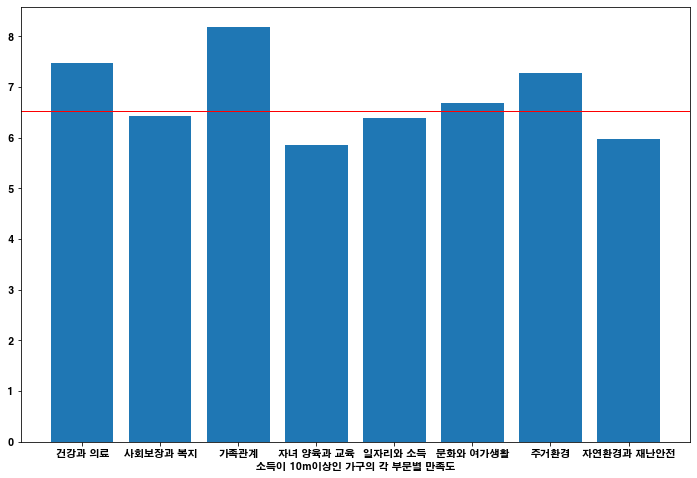

In [85]:
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
ypos = np.arange(8)
rects = plt.bar(ypos,sections_satfs10,align='center')
plt.xticks(ypos, qlist1_K)
plt.axhline(y=income_satf[8], color='r', linewidth=1)


plt.xlabel('소득이 10m이상인 가구의 각 부문별 만족도')
plt.show()

In [93]:
#연령별 각 문항에 대한 만족도 평균
qlist2=['Q2_1','Q2_2','Q2_3','Q2_4','Q2_5','Q2_6','Q2_7','Q2_8']
qlist2_list=[]
for x in qlist2:
    ageMean=dt[x].groupby(dt['Ages']).mean()
    print(ageMean)
    qlist2_list.append(ageMean)
    print('=========================')

Ages
1.0    7.248062
2.0    7.026515
3.0    6.794613
4.0    6.712871
5.0    6.547619
Name: Q2_1, dtype: float64
Ages
1.0    6.213178
2.0    5.678030
3.0    5.797980
4.0    5.775578
5.0    6.066138
Name: Q2_2, dtype: float64
Ages
1.0    7.941860
2.0    7.962121
3.0    7.983165
4.0    7.854785
5.0    7.476190
Name: Q2_3, dtype: float64
Ages
1.0    5.800000
2.0    6.101266
3.0    6.509881
4.0    7.047170
5.0    6.964539
Name: Q2_4, dtype: float64
Ages
1.0    5.782946
2.0    5.803030
3.0    5.710438
4.0    5.171617
5.0    4.947090
Name: Q2_5, dtype: float64
Ages
1.0    6.643411
2.0    5.928030
3.0    5.643098
4.0    5.267327
5.0    5.150794
Name: Q2_6, dtype: float64
Ages
1.0    6.968992
2.0    6.356061
3.0    6.498316
4.0    6.580858
5.0    6.317460
Name: Q2_7, dtype: float64
Ages
1.0    6.271318
2.0    5.803030
3.0    5.865320
4.0    5.831683
5.0    5.735450
Name: Q2_8, dtype: float64


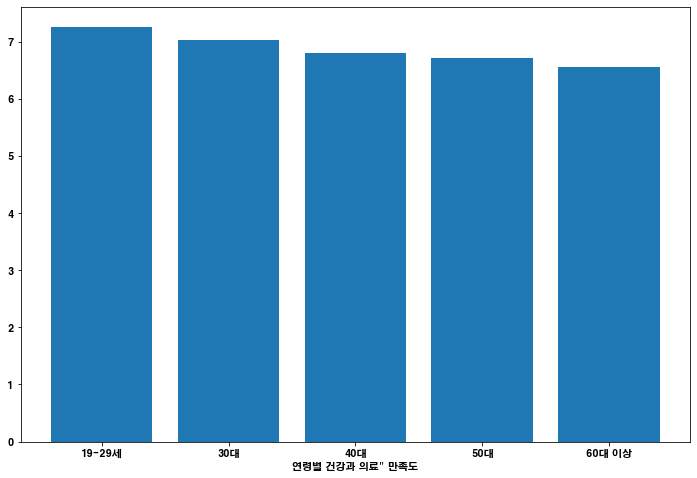

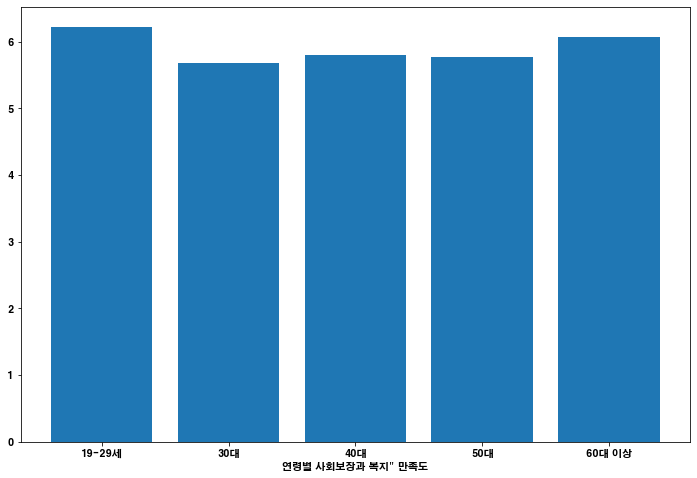

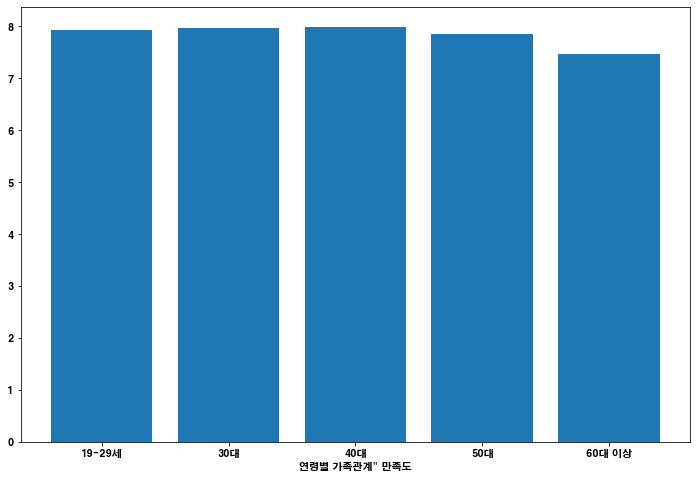

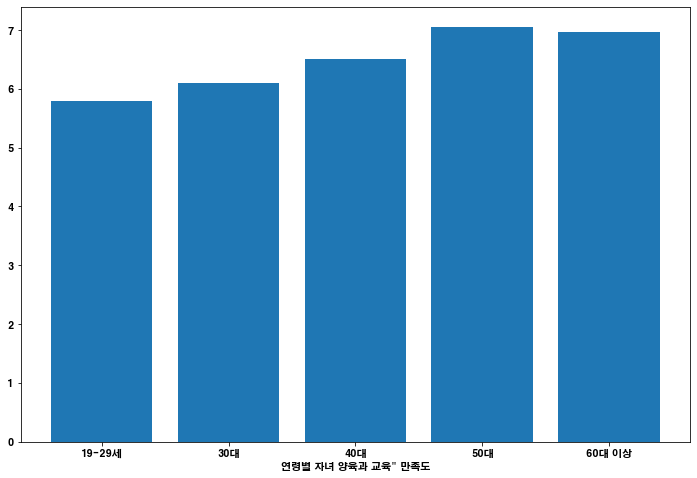

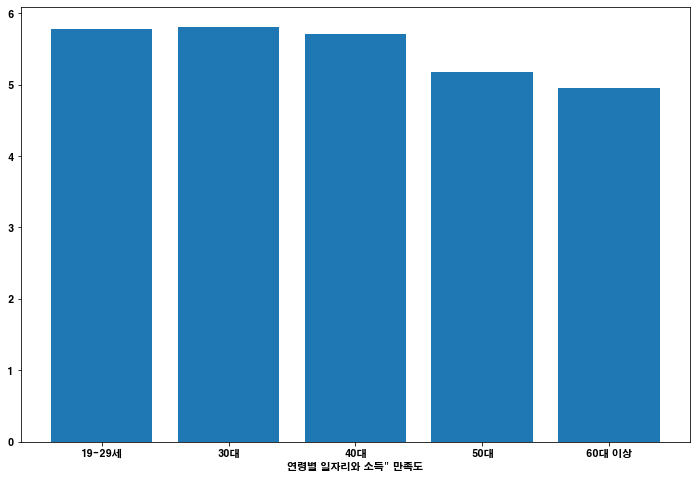

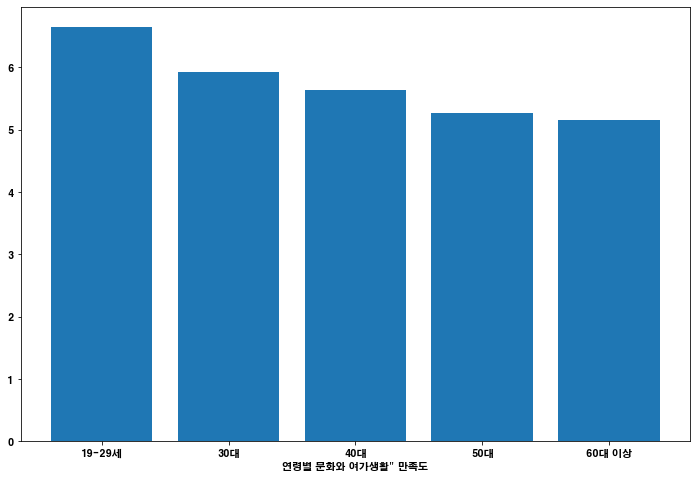

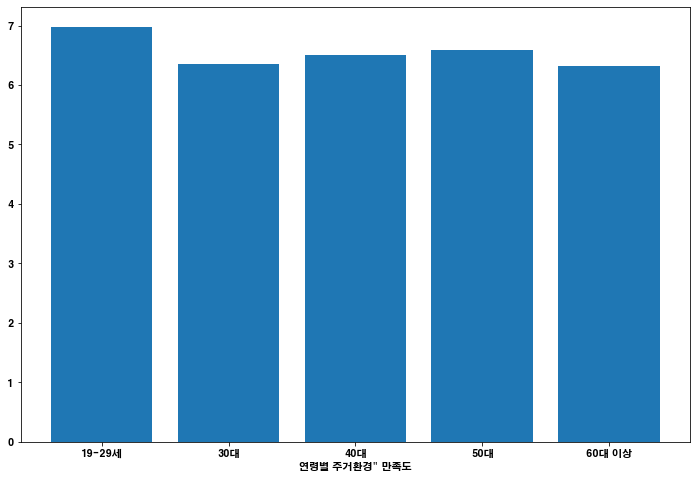

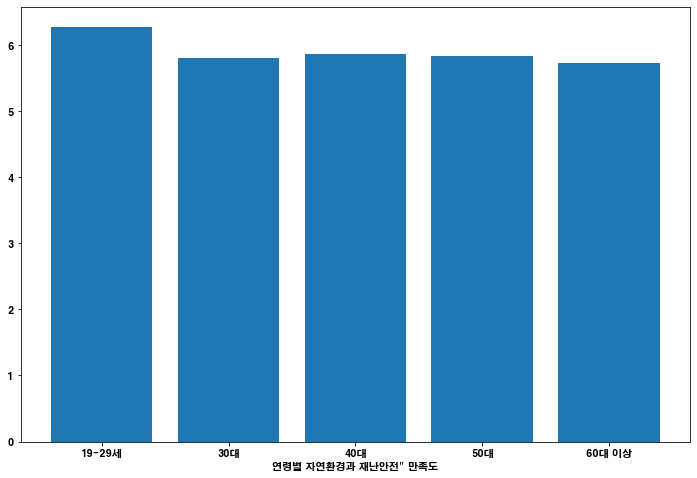

In [94]:
index_list=["19-29세", "30대", "40대" ,"50대", "60대 이상"]
qlist1_K=['건강과 의료','사회보장과 복지','가족관계','자녀 양육과 교육','일자리와 소득','문화와 여가생활','주거환경','자연환경과 재난안전']

for i,j in zip(qlist1_K, qlist2_list):
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(111)
    ypos = np.arange(5)
    rects = plt.bar(ypos,j,align='center')
    plt.xticks(ypos, index_list)

    plt.xlabel('연령별 ' + i + '" 만족도')
    plt.show()